# Diabetes Prediction

## Importing Libraries

In [144]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns   


## Reading Dataset

In [145]:
data = pd.read_csv("../Dataset/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [146]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- We can clearly see that the min value for glucose,blood pressure ... etc are 0 which is not possible hence we will replace this zero to mean of the column. 

In [147]:
# Checking null value
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- No null values.

In [148]:
# Replacing 0 with mean.
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())


In [149]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot: >

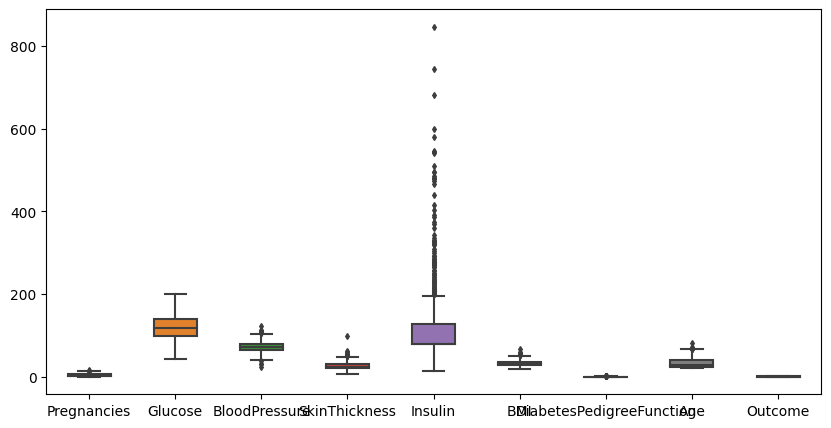

In [150]:
# Handling Outliers using box plot
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=data, width=0.5,ax=ax,fliersize=3)

- Clearly Insulin has too many outliers
- We will use standard scaler to manage outliers.

## Splitting into dependent and independent feature.

In [151]:

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

## Train-test split 

In [152]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Standardization

In [153]:
import pickle
def standard_scaler(X_train,X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    file = open("../Models/standardScaler.pkl","wb")
    pickle.dump(scaler,file)
    file.close()
    
    return X_train_scaled,X_test_scaled

In [154]:
X_train_scaled , X_test_scaled = standard_scaler(X_train, X_test)

## Model Training

### Logistic Regression

In [163]:
log_reg_classifier = LogisticRegression()
log_reg_classifier.fit(X_train_scaled,y_train)
y_pred = log_reg_classifier.predict(X_test_scaled)

In [164]:
#Checking accuracy
acc = accuracy_score(y_pred, y_test)
cfmat = confusion_matrix(y_pred,y_test)
print(acc)
print(cfmat)

0.7662337662337663
[[83 20]
 [16 35]]


#### Hyperparameter Tuning

In [173]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
parameter = {
    "penalty": ['l1', 'l2', 'elasticnet', None],
    "C": np.logspace(-3, 3, 7),
    "solver": ['newton-cg', 'lbfgs', 'liblinear'],
    "max_iter": [100, 200, 300],  # Example additional parameter
    "class_weight": [None, 'balanced'],  # Example additional parameter
}
clf = GridSearchCV(log_reg_classifier,param_grid=parameter,scoring="accuracy", cv=10)
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(C=0.001, penalty=None,
                                          solver='newton-cg'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [174]:
clf.best_params_

{'C': 0.001,
 'class_weight': None,
 'max_iter': 100,
 'penalty': None,
 'solver': 'newton-cg'}

In [175]:
clf.best_score_

0.7686673717609731

In [176]:
y_pred = clf.predict(X_test_scaled) 
print(accuracy_score(y_pred,y_test))

0.7662337662337663


In [177]:
log_reg_classifier = LogisticRegression(penalty=None, C=0.001, solver='newton-cg', class_weight=None, max_iter=100)
log_reg_classifier.fit(X_train_scaled,y_train)
y_pred = log_reg_classifier.predict(X_test_scaled)

## Checking accuracy after hyperparameter tuning 

In [178]:
acc = accuracy_score(y_pred, y_test)
cnfmat = confusion_matrix(y_pred,y_test)

print(cnfmat)
print(acc)

[[83 20]
 [16 35]]
0.7662337662337663


## <b> 76.62% </b>

In [179]:
tp = cnfmat[0][0]
fp = cnfmat[0][1]
fn = cnfmat[1][0]
tn = cnfmat[1][1]

In [ ]:
accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = 2*(recall*precision)/(recall+precision)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Accuracy: 0.7662337662337663
Precision: 0.8058252427184466
Recall: 0.8383838383838383
F1 Score: 0.8217821782178217


## Decision Tree

In [180]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [181]:
y_pred = tree_classifier.predict(X_test_scaled)

In [182]:
print(accuracy_score(y_pred,y_test))

0.7337662337662337


#### Hyperparameter Tuning 

In [183]:
parameter = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth':[1,2,3,4,5],
    'max_features': ['auto','sqrt','log2'] 
}

In [184]:
import warnings 
warnings.filterwarnings('ignore')
clf = GridSearchCV(tree_classifier, param_grid=parameter, cv=5,scoring='neg_mean_squared_error')
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [185]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

#### Retraining Decision Tree Classifier

In [187]:
tree_classifier = DecisionTreeClassifier(criterion= 'entropy', max_depth=3, max_features='log2' , splitter= 'best')
tree_classifier.fit(X_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='log2')

In [188]:
y_pred = tree_classifier.predict(X_test_scaled)

In [189]:
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.7012987012987013
[[78 25]
 [21 30]]


## <b> 70.12% </b>

## SVM Classifier

In [190]:
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(X_train_scaled,y_train)
y_pred = svc_classifier.predict(X_test_scaled)
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.7337662337662337
[[82 24]
 [17 31]]


In [191]:
parameters={
    "C":[0.01,0.1, 1],
    "gamma":['scale', 'auto'],
    "kernel": ["linear", "rbf", "sigmoid"]
}

In [192]:
clf = GridSearchCV(svc_classifier, param_grid=parameters, cv=5)
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid']})

In [193]:
clf.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [194]:
y_pred = clf.predict(X_test_scaled)
print(accuracy_score(y_pred,y_test))

0.7597402597402597


## <b> 75.59% </b>

## Naive Bayes

In [195]:
from sklearn.naive_bayes import GaussianNB
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train_scaled,y_train)

GaussianNB()

In [196]:
y_pred = gnb_classifier.predict(X_test_scaled)
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.7532467532467533
[[78 17]
 [21 38]]


# <b> 75.32% </b>

## Pickling of model.

In [198]:
file = open("../Models/logisticRegression.pkl", "wb")
pickle.dump(log_reg_classifier,file)
file.close()

# END